$$
\newcommand{\KK}{\mathbb{K}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\ZZ}{\mathbb{Z}}
\newcommand{\cF}{\mathcal{F}}
\DeclareMathOperator{\rk}{Rank}
$$
In a joint work *Module structure of the homology of right-angled Artin kernels*, with J.I. Cogolludo, S. López de Medrano, and D. Matei, we provide formulas for the objects cited in the title. This paper should be uploaded soon to <kbd>arXiv</kbd>.

In this `Jupyter notebook` we provide functions that can help to use these formulas. We start from a graph $\Gamma$. Next cell is an example of a graph which will serve to illustrate the computations. The reader can apply the functions to other graphs as needed. The next cell contains some `python` orders, the definition of a graph (with positions of its vertices to obtain a better picture) and a list of integers (associated to the vertices of $\Gamma$), whose role which be explained soon.

The variable `rv` keeps the number of vertices of $\Gamma$.

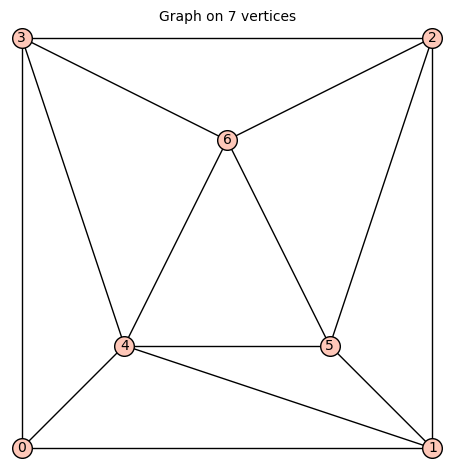

In [4]:
from IPython.display import Markdown, display, Latex
rv=7
g=Graph(rv)
L=4*[1]+3*[2]
g.add_edges([(i,i+1,None) for i in range(3)])
g.add_edges([(3,0,None)])
g.add_edges([(i,i+1,None) for i in (4,5)])
g.add_edges([(6,4,None)])
g.add_edges([(i,j,None) for i,j in [(0,4),(1,4),(1,5),(2,5),(2,6),(3,6),(3,4)]])
posicion={0:(-2,-2),1:(2,-2),2:(2,2),3:(-2,2),4:(-1,-1),5:(1,-1),6:(0,1)}
g.set_pos(posicion)
g

Given the simplicial graph $\Gamma$ (with set of vertices $V$), we construct the right-angled Artin group $G_\Gamma$, having as generators the vertices and as relations the commutators of vertices connected by an edge. We fix a character $\chi:G_\Gamma\to\mathbb{Z}$; the integers $\chi(v)$ are encoded in the above list `L`. The character is *non-resonant*, i.e., $\chi(v)\neq 0, \forall v\in V$, and in fact witout loss of generality we always take them positive. Let $A^\chi:=\ker\chi$.

The homology $H_k(A^\chi;\KK)$ has a natural structure of $\Lambda$-module, $\Lambda:=\KK[t^{\pm 1}]$, and its computation is the main goal of the work. This homology is relate to flag or clique complex $\cF$ of $\Gamma$. We construct it for the example. To be cautious we set $\mathcal{F}$ as `immutable`. In this example the picture of $\Gamma$ allows to understand $\cF$.

In [5]:
F=g.clique_complex()
n=F.dimension()
F.set_immutable()
show(F)
n

Simplicial complex with vertex set (0, 1, 2, 3, 4, 5, 6) and 8 facets

2

Since $\Lambda$ is a euclidean domain, and the homology is a finitely generated $\Lambda$-module. The torsion structure is very particular, see <a href="https://doi.org/10.1016/j.aim.2008.09.008">Papadima and Suci</a>:
$$
H_{k+1}(A^\chi;\mathbb{K})\cong\Lambda^{r_k}\oplus\bigoplus_{d,j\in\NN}\left(\frac{\Lambda}{\langle\Phi_d^j\rangle}\right)^{r_{k,j}(d)}.
$$
Moreover, the actual $d$'s are among the divisors of $\chi(v)$, $v\in V$, and $\tilde{H}_k(\cF;\KK)\cong\KK^{r_k}$. 

In our work we find some further properties of the $r_{k,j}(d)$, which in some cases are enough to determine them, in particular for $k=0,1$.

Next cell computes the reduced homology of $\cF$ for the example, which vanishes since $\cF$ is contractible.

In [6]:
Fc=F.chain_complex(augmented=True)
libre=Fc.betti()
cadena=''
for j in libre.keys():
    cadena+='$r_{'+(j+1).str()+'}='+libre[j].str()+'$ '
display(Latex(cadena))

<IPython.core.display.Latex object>

The values of $r_{k,j}(1)$ have been computed by Papadima and Suciu. If $\partial$ is the differential of $\cF$, then $r_{k,1}(1)=\rk\partial_{k+1}$ and $r_{k,j}(1)=0$ if $j>1$.
The computation for the example is done.

In [7]:
cadena=''
for j in [0..n]:
    a=Fc.differential(j).rank()
    cadena+='$r_{'+(j-1).str()+',1}(1)='+str(a)+'$ '
display(Latex(cadena))

<IPython.core.display.Latex object>

Let us compute the rest of the torsion. We have to deal with the values divisors $d$ of the values $\chi(v)$. In our example, the only needed value is $d=2$. We define a weight $\omega:V\to\{0,1\}$, such that $\omega(v)=0$ if and only if $d$ is not a divisor of $\chi(v)$. This weight extends to the simplicial complex $\cF$.


The following cell computes a dictionnary `multis` which shows the multiplicity of any simplex in $\cF$.

In [8]:
d=2
W=[]
for a in L:
    if a/d in ZZ:
        W.append(1)
    else:
        W.append(0)
multis={a:sum(W[i] for i in a) for j in [-1..F.dimension()] for a in F.cells()[j]}

We denote The $k$-skeleton $\mathcal{F}^k$ of $\mathcal{F}$ is needed. The function `esqueletos` provides a dictionnary with all the skeletons of $\mathcal{F}$. We keep in `F_esq` the skeletons of the example.

In [9]:
def esqueletos(F0):
    Fm=copy(F0)
    n=Fm.dimension()
    esq={n:F0}
    while n>=0:
        Fm.remove_faces([list(_) for _ in Fm.cells()[n]])
        Fi=copy(Fm)
        Fi.set_immutable()
        n=Fi.dimension()
        esq[n]=Fi
    return(esq)

In [10]:
F_esq=esqueletos(F)
for j in [0..F.dimension()]:
    print (F_esq[j])

Simplicial complex with vertex set (0, 1, 2, 3, 4, 5, 6) and facets {(0,), (1,), (2,), (3,), (4,), (5,), (6,)}
Simplicial complex with vertex set (0, 1, 2, 3, 4, 5, 6) and 14 facets
Simplicial complex with vertex set (0, 1, 2, 3, 4, 5, 6) and 8 facets


We need also the sub-complexes defined by the weights. For a couple $(k,j)$, we consider the subcomplex $\mathcal{F}_j^k$ formed by the $(k-1)$-skeleton $\mathcal{F}^{k-1}$ and the $k$-simplexes of weight $\leq j$. The function `filtrados` provide a dictionnary with keys $(k,j)$. The dictionnary $U$ keeps the data of the example.

In [11]:
def filtrados(F0,d):
    esq=esqueletos(F0)
    n=F0.dimension()
    W=[]
    for a in L:
        if a/d in ZZ:
            W.append(1)
        else:
            W.append(0)
    esqu_f={}
    while n>=0:
        Fm=copy(esq[n])
        for j in [n,n-1,..,0]:
            mlt={a:sum(W[i] for i in a) for a in Fm.cells()[n]}
            A=[list(_) for _ in Fm.cells()[n] if mlt[_]==j+1]
            #print(A)
            Fm.remove_faces(A)
            #print(Fm.dimension())
            #print(Fm)
            #print(Fm.cells()[n])
            Fi=copy(Fm)
            Fi.set_immutable()
            esqu_f[n,j]=Fi
        n=n-1
    return (esqu_f)

In [12]:
U=filtrados(F,d)

In order to keep formulas simple we compute properties only when $k\leq m$ and $\cF$ is $m$-connected (in fact, we need the $\KK$-homology to vanish when $k\leq m$.

One of our results is the following one:
$$
m_k=\sum_{j=1}^{n} j r_{k,j}(d)=
\sum_{j=0}^{k+1}\dim \tilde{H}_k(\mathcal{F}_j^{k+1};\KK)+
\sum_{j=0}^{k}\dim \tilde{H}_k(\mathcal{F}_j^{k};\KK)
-(k+1)\dim \tilde{H}_k(\mathcal{F}^{k};\KK).
$$
Let us compute the reduced homology of the filtered subcomplexes. The value of `homologias(i,j,h)` is $\dim_\KK\tilde{H}_h(\cF_j^i;\KK)$. The dictionnary `m` keeps the values $m_k$.

In [13]:
def homologias(i,j,h):
    if (i,j) not in U.keys() and j-i!=1:
        return(0)
    elif j-i==1:
        CS=F_esq[i]
    else:
        CS=U[i,j]
    C=CS.chain_complex(augmented=True)
    if h>CS.dimension():
        return(0)
    else:
        return C.betti()[h]

In [15]:
m={}
for k in [0..F.dimension()]:
    a=sum([homologias(k+1,j,k) for j in [0..k+1]])
    a+=sum([homologias(k,j,k) for j in [0..k]])-(k+1)*homologias(k,k+1,k)
    m[k]=a

In [16]:
for k in [0..F.dimension()]:
    cadena='$m_{'+(k).str()+'}='+m[k].str()+'$ '
    display(Latex(cadena))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We have also proved that if $h>k+2$ the $r_{k,h}(d)=0$. Under the $m$-connected hypothesis, the following holds: 
$$
r_{k,k+2}(d)=\rk\left(\tilde{H}_k(\cF_0^k;\KK)\to\tilde{H}_{k+1}(\mathcal{F}_{k+1}^{k+1};\KK)\right).
$$
The way to compute these values is rather technical. We will keep them in the dictionnary `rk2`. 

We start with $k=0$. We need to define the inclusion morphism `H0` from $\cF_{0}^{0}$ (the set of vertices of weight $0$, in the list `V0`) into $\cF_1^1$.  We compute the rank of the induced morphism in homology. Since we need to deal with reduced homology, we need to substract $1$. The result shows that in the example there is no factor $\Lambda/\langle(t+1)^2\rangle$ in $H_1(A^\chi;\KK)$.

In [23]:
V0=[j for j in range(rv) if W[j]==0]

In [24]:
dic0={j:j for j in [0..len(U[0,0].cells()[0])-1]}
Hom0=U[0,0].Hom(U[1,1])
H0=Hom0(dic0)
H0

Simplicial complex morphism:
  From: Simplicial complex with vertex set (0, 1, 2, 3) and facets {(0,), (1,), (2,), (3,)}
  To:   Simplicial complex with vertex set (0, 1, 2, 3, 4, 5, 6) and 11 facets
  Defn: 0 |--> 0
        1 |--> 1
        2 |--> 2
        3 |--> 3

In [25]:
rk2={}
rk2[0]=H0.induced_homology_morphism().to_matrix(0).rank()-1
rk2

{0: 0}

With the same ideas we compute the next values.

In [26]:
for k in [1..F.dimension()-1]:
    dic={j:j for j in [0..len(g.vertices())-1]}
    Homk=U[k,0].Hom(U[k+1,k+1])
    H0=Homk(dic)
    rk2[k]=H0.induced_homology_morphism().to_matrix(k).rank()

In [27]:
rk2

{0: 0, 1: 1}

As a consequence $H_2(A^\chi;\KK)$ has a factor $\Lambda/\langle(t+1)^3\rangle$ which turns out to be the whole $H_2(A^\chi;\KK)$.

Next formula is $r_{k,1}(d)=\dim_\KK H_{k+1}^-(\mathbb{T}^{\rho_2(d)};\KK)-\dim_\KK H_{k}^-(\mathbb{T}^{\rho_2(d)};\KK)$.

Let us explain the notation. The character $\rho_2(d):G_\Gamma\to\ZZ/2$ is defined via the weight: $\rho_2(d)(v):=1-\omega(v)$. The space $\mathbb{T}^{\rho_2(d)}$ is the double cover of an Eilenberg-McLane space for $G_\Gamma$ defined by $\rho_2(d)$. The superindex $-$ means anti-invariant homology. There is a simple way to obtain the complex defining $H_{k}^-(\mathbb{T}^{\rho_2(d)};\KK)$.

In [28]:
def diferencialesm(F,W):
    cfg=F.chain_complex(augmented=True)
    n=F.dimension()
    bs=[F._n_cells_sorted(j) for j in [0..n+1]]
    difs=[cfg.differential(j) for j in range(n+1)]
    difst={}
    for u in range(n+1):
        A=difs[u].change_ring(QQ)
        C=bs[u]
        if u==0:
            D=[()]
        else:
            D=bs[u-1]
        for a in C:
            j=C.index(a)
            for b in D:
                i=D.index(b)
                c=[k for k in a if k not in b]
                if len(c)==1:
                    if W[c[0]]==0:
                        A[i,j]=-2*A[i,j]
                    else:
                        A[i,j]=0
        difst[u]=A
    return difst

In [30]:
dQtm=diferencialesm(F,W)
Cm=ChainComplex({a:dQtm[a].transpose() for a in dQtm.keys()})
Cm.betti()

{0: 0, 1: 0, 2: 1, 3: 1}

Finally, we can check the above results constructing a $\Lambda$-complex whose homology is $H_*(A^\chi;\KK)$. For computational reasons we work in $\KK[t]$. In order to find the torsion part of the homology, it is enough to find the Smith form of the differential matrices. 

In [31]:
R.<t>=QQ[]
def diferencialesQt(F,L):
    cfg=F.chain_complex(augmented=True)
    n=F.dimension()
    bs=[F._n_cells_sorted(j) for j in [0..n+1]]
    difs=[cfg.differential(j) for j in range(n+1)]
    difst={}
    for u in range(n+1):
        A=difs[u].change_ring(R)
        C=bs[u]
        if u==0:
            D=[()]
        else:
            D=bs[u-1]
        for a in C:
            j=C.index(a)
            for b in D:
                i=D.index(b)
                c=[k for k in a if k not in b]
                if len(c)==1:
                    A[i,j]=(t^L[c[0]]-1)*A[i,j]
        difst[u]=A
    return difst

In [34]:
dQt=diferencialesQt(F,L)
sm={}
for j in [0..F.dimension()]:
    A=dQt[j]
    B=A.smith_form()[0]
    C=[_.factor() for _ in B.diagonal() if _!=0]
    sm[j]=C
for j in sm.keys():
    show(sm[j])

[t - 1]

[(-1) * (t - 1), (-1) * (t - 1), t - 1, (-1) * (t - 1), t - 1, t - 1]

[t - 1, t - 1, t - 1, t - 1, t - 1, t - 1, t - 1, (-1) * (t - 1) * (t + 1)^3]